## Observations and Insights 

## Observations

1. It is evident from the summary statistics data that Capomulin and Ramicane are the more successful drug treatments, in comparison with the others, with the average tumor volume (mm3) sitting at 40.675741 mm3 and 40.216745 mm3 respectively. There are also no outliers found in either drug when looking at final tumor volume but an outlier was found for the Infubinol drug treatment. 

2. 50.2% of the mice are male and 49.8% of them are female. This information alone does not have much analytical value thus, in a future study, there could be more data collected on the difference in sucess rates between male and female mice for specific drug treatments. 

3. We can see from regression line that there is a strong, positive correlation between the weight of mice treated with Capomulin and the average tumor volume. This can also be deduced from the R-squared value of 0.8419363424694718. 

In [75]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice.
num_mice = combined_df['Mouse ID'].nunique()
print(num_mice)

249


In [12]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = combined_df[combined_df.duplicated(subset=['Mouse ID','Timepoint'])]
print(duplicate_df['Mouse ID'])
print("The duplicate mouse is g989. ")

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object
The duplicate mouse is g989. 


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
print(duplicate_df)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_df = combined_df.drop_duplicates(subset=['Mouse ID','Timepoint'], keep='first')
clean_combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [13]:
# Checking the number of mice in the clean DataFrame.
num_mice = clean_combined_df['Mouse ID'].nunique()
print(num_mice)

249


## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of 
# the tumor volume for each regimen

# Group clean dataframe by Drug Regimen 
drug_regimen_group = clean_combined_df.groupby(['Drug Regimen'])

# Calculate Mean, median, variance, standard deviation, SEM 
mean_tumour_vol = drug_regimen_group['Tumor Volume (mm3)'].mean()
median_tumour_vol = drug_regimen_group['Tumor Volume (mm3)'].median()
var_tumour_vol = drug_regimen_group['Tumor Volume (mm3)'].var()
sd_tumour_vol = drug_regimen_group['Tumor Volume (mm3)'].std()
sem_tumour_vol = drug_regimen_group['Tumor Volume (mm3)'].sem()

# Create a summary statistics dataframe with the values above 
summary_stats = pd.DataFrame({
    "Mean Tumour Volume": mean_tumour_vol,
    "Median Tumour Volume": median_tumour_vol,
    "Variance Tumour Volume": var_tumour_vol,
    "Standard Deviation Tumour Volume": sd_tumour_vol,
    "SEM Tumour Volume": sem_tumour_vol
})

summary_stats

# Format to 3 decimal places 


,Mean Tumour Volume,Median Tumour Volume,Variance Tumour Volume,Standard Deviation Tumour Volume,SEM Tumour Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts


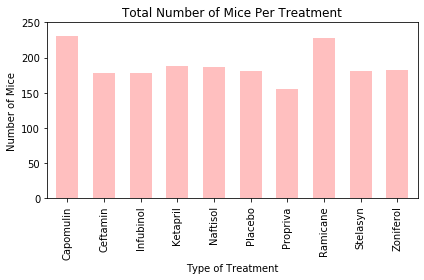

In [15]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Group clean dataframe by Drug Regimen 
drug_regimen_group = clean_combined_df.groupby(['Drug Regimen'])

# Calculate total mice per regimen 
total_mice_per_regimen = drug_regimen_group['Mouse ID'].count()

# Plot a bar chart based off of the groupby above
pandas_bar_chart = total_mice_per_regimen.plot(kind='bar', color='r', alpha=0.25, align="center", width=0.6, legend=False)

# Chart Formatting 
pandas_bar_chart.set_ylabel("Number of Mice")
pandas_bar_chart.set_xlabel("Type of Treatment")
pandas_bar_chart.set_title("Total Number of Mice Per Treatment")
pandas_bar_chart.set_ylim(0,max(total_mice_per_regimen)+20)
plt.tight_layout()

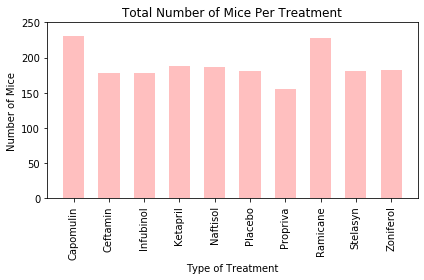

In [17]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Reset the index 
df = total_mice_per_regimen.reset_index()

# Set the x and y axis values
drugs = df['Drug Regimen']
mice_by_drug = pd.Series(total_mice_per_regimen)
x_axis = np.arange(len(mice_by_drug))

# Plot bar chart 
plt.bar(x_axis, mice_by_drug, color='r', alpha=0.25, align="center", width=0.6)

# Set tick locations using a list comprehension
tick_locations=[value for value in x_axis]
plt.xticks(tick_locations,drugs, rotation=90)

# Chart formatting 
plt.ylabel("Number of Mice")
plt.xlabel("Type of Treatment")
plt.title("Total Number of Mice Per Treatment")

plt.xlim(-0.75,len(x_axis)-0.25)
plt.ylim(0,max(mice_by_drug)+20)
plt.tight_layout()
plt.show()


In [18]:
clean_combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


(-1.205932640501736, 1.106768431925549, -1.1001107357410598, 1.102325450562254)

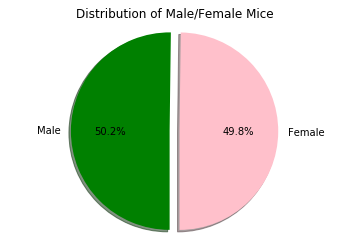

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Group by Sex and count how many mice are in either categories
mice_gender = clean_combined_df.groupby(['Sex'])
gender_count = mice_gender['Mouse ID'].nunique()

# Set extra parameters for formatting the pie chart 
colors = ["pink","green"]
explode = [0,0.1]

# Plot the pie chart 
pandas_pie_chart = gender_count.plot(kind="pie", y="Mouse ID", explode=explode, colors=colors,
                            autopct="%1.1f%%", shadow=True, startangle=270, legend=False)

# Formatting Chart
pandas_pie_chart.set_ylabel('')
pandas_pie_chart.set_title("Distribution of Male/Female Mice")
plt.axis("equal")

(-1.205932640501736, 1.106768431925549, -1.1001107357410598, 1.102325450562254)

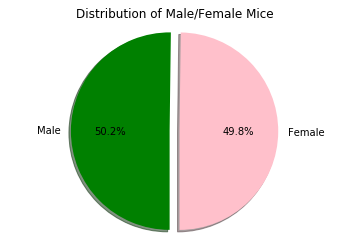

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Group by Sex and count how many mice are in either categories
mice_gender = clean_combined_df.groupby(['Sex'])
gender_count = mice_gender['Mouse ID'].nunique()

# Set extra parameters for formatting the pie chart 
gender_dist = [124,125]
labels = ["Female", "Male"]
colors = ["pink","green"]
explode = [0,0.1]

# Plot the pie chart 
plt.pie(gender_dist, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)

# Formatting Chart
plt.title("Distribution of Male/Female Mice")
plt.axis("equal")

In [21]:
clean_combined_df.head(15)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Quartiles, Outliers and Boxplots

In [22]:
# Checking to see if the maxtimepoint for each of the 249 mice is different 
time_point = clean_combined_df.groupby("Timepoint")
mice_count = time_point['Mouse ID'].count()
mice_count

# As time increases and tumours grow, less mice survive so max(timepoints) will differ. 

Timepoint
0     249
5     237
10    222
15    206
20    194
25    183
30    171
35    154
40    142
45    130
Name: Mouse ID, dtype: int64

In [23]:
# Obtain max timepoint for each mice per treatment regime 

# CAPOMULIN: MAX TIMEPOINTS
capomulin_treatment = clean_combined_df.loc[(clean_combined_df["Drug Regimen"] =="Capomulin")]
# Group  the filtered data by Mouse ID to determine max timepoint for each mouse given Ramicane 
capomulin_group = capomulin_treatment.groupby('Mouse ID')
capomulin_max_tp = capomulin_group['Timepoint'].max()

# RAMICANE: MAX TIMEPOINTS
ramicane_treatment = clean_combined_df.loc[(clean_combined_df["Drug Regimen"] =="Ramicane")]
# Group  the filtered data by Mouse ID to determine max timepoint for each mouse given Ramicane 
ramicane_group = ramicane_treatment.groupby('Mouse ID')
ramicane_max_tp = ramicane_group['Timepoint'].max()

# INFUBINOL: MAX TIMEPOINTS
infubinol_treatment = clean_combined_df.loc[(clean_combined_df["Drug Regimen"] =="Infubinol")]
# Group  the filtered data by Mouse ID to determine max timepoint for each mouse given Ramicane 
infubinol_group = infubinol_treatment.groupby('Mouse ID')
infubinol_max_tp = infubinol_group['Timepoint'].max()

# CEFTAMIN: MAX TIMEPOINTS
ceftamin_treatment = clean_combined_df.loc[(clean_combined_df["Drug Regimen"] =="Ceftamin")]
# Group  the filtered data by Mouse ID to determine max timepoint for each mouse given Ramicane 
ceftamin_group = ceftamin_treatment.groupby('Mouse ID')
ceftamin_max_tp = ceftamin_group['Timepoint'].max()


In [24]:
# Combine these individual series into a df 
all_max_tp = pd.concat([capomulin_max_tp, ramicane_max_tp, infubinol_max_tp, ceftamin_max_tp])
max_tp_df = all_max_tp.to_frame()

# Clean dataframe for merge 
max_tp_df = max_tp_df.reset_index()
max_tp_df

# Merge this max_tp_group df with clean data frame to obtain Final Tumour Volumes for the 4 treatment regimens 
final_tumor_df = pd.merge(max_tp_df, clean_combined_df, on=["Mouse ID", "Timepoint"],)
final_tumor_df = final_tumor_df.rename(columns={"Timepoint":"Max Timepoint", "Tumor Volume (mm3)":"Final Tumor Volume (mm3)" })
final_tumor_df

,Mouse ID,Max Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Final Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
95,x226,0,Ceftamin,Male,23,28,45.000000,0
96,x581,45,Ceftamin,Female,19,28,64.634949,3
97,x822,45,Ceftamin,Male,3,29,61.386660,3
98,y769,45,Ceftamin,Female,6,27,68.594745,4


CAPOMULIN CALCULATIONS
The lower quartile of tumor size is: 32.37735684
The upper quartile of tumor size is: 40.1592203
The interquartile range of tumor size is: 7.781863460000004
The the median of tumor size is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
------------------------------------------------------------
RAMICANE CALCULATIONS
The lower quartile of tumor size is: 31.56046955
The upper quartile of tumor size is: 40.65900627
The interquartile range of tumor size is: 9.098536719999998
The the median of tumor size is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
------------------------------------------------------------
INFUBINOL CALCULATIONS
The lower quartile of tumor size is: 54.04860769
The upper quartile of tumor size is: 65.52574285
The interquartile range of tumor size is: 11.477135160000003
The the median of tumor size is: 60.16518046 
Va

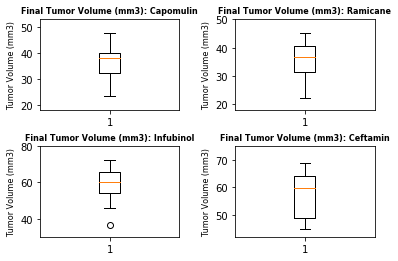

In [26]:
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Put treatments into a list for the for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vols = []

# Create for loop to 1) obtain the final tumor volume for each time each treatment was administered, 2) create boxplots for each drug treatment
for x in range(0,len(treatments)):
    
    if x == 0:
        capomulin = final_tumor_df.loc[final_tumor_df["Drug Regimen"] == treatments[x], ("Drug Regimen","Final Tumor Volume (mm3)")]
        tumor_vols = capomulin
        
        # Create boxplot for Capomulin
        axs[0, 0].boxplot(capomulin['Final Tumor Volume (mm3)'])
        axs[0, 0].set_title('Final Tumor Volume (mm3): Capomulin', weight = "bold", fontsize=8)
        axs[0, 0].set_ylabel('Tumor Volume (mm3)',fontsize=8)        
        axs[0, 0].set_ylim(18,53)
        
        # Calculate IQR, lower and upper bounds 
        quartiles = capomulin['Final Tumor Volume (mm3)'].quantile([.25,.5,.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq-lowerq

        print("CAPOMULIN CALCULATIONS")
        print(f"The lower quartile of tumor size is: {lowerq}")
        print(f"The upper quartile of tumor size is: {upperq}")
        print(f"The interquartile range of tumor size is: {iqr}")
        print(f"The the median of tumor size is: {quartiles[0.5]} ")

        lower_bound = lowerq - (1.5*iqr)
        upper_bound = upperq + (1.5*iqr)
        print(f"Values below {lower_bound} could be outliers.")
        print(f"Values above {upper_bound} could be outliers.")

    elif x == 1: 
        ramicane = final_tumor_df.loc[final_tumor_df["Drug Regimen"] == treatments[x], ("Drug Regimen","Final Tumor Volume (mm3)")]
        tumor_vols = tumor_vols.append(ramicane)
        
        # Create boxplot for Ramicane
        axs[0, 1].boxplot(ramicane['Final Tumor Volume (mm3)'])
        axs[0, 1].set_title('Final Tumor Volume (mm3): Ramicane', weight = "bold", fontsize=8)
        axs[0, 1].set_ylabel('Tumor Volume (mm3)',fontsize=8)  
        axs[0, 1].set_ylim(18,50)  
        
        
        # Calculate IQR, lower and upper bounds 
        quartiles = ramicane['Final Tumor Volume (mm3)'].quantile([.25,.5,.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq-lowerq

        print("------------------------------------------------------------")
        print("RAMICANE CALCULATIONS")
        print(f"The lower quartile of tumor size is: {lowerq}")
        print(f"The upper quartile of tumor size is: {upperq}")
        print(f"The interquartile range of tumor size is: {iqr}")
        print(f"The the median of tumor size is: {quartiles[0.5]} ")

        lower_bound = lowerq - (1.5*iqr)
        upper_bound = upperq + (1.5*iqr)
        print(f"Values below {lower_bound} could be outliers.")
        print(f"Values above {upper_bound} could be outliers.")
        
    elif x == 2: 
        infubinol = final_tumor_df.loc[final_tumor_df["Drug Regimen"] == treatments[x], ("Drug Regimen","Final Tumor Volume (mm3)")]
        tumor_vols = tumor_vols.append(infubinol)
        
        # Create boxplot for Infubinol
        axs[1, 0].boxplot(infubinol['Final Tumor Volume (mm3)'])
        axs[1, 0].set_title('Final Tumor Volume (mm3): Infubinol', weight = "bold", fontsize=8)
        axs[1, 0].set_ylabel('Tumor Volume (mm3)',fontsize=8)
        axs[1, 0].set_ylim(30,80)
        
        # Calculate IQR, lower and upper bounds 
        quartiles = infubinol['Final Tumor Volume (mm3)'].quantile([.25,.5,.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq-lowerq

        print("------------------------------------------------------------")
        print("INFUBINOL CALCULATIONS")
        print(f"The lower quartile of tumor size is: {lowerq}")
        print(f"The upper quartile of tumor size is: {upperq}")
        print(f"The interquartile range of tumor size is: {iqr}")
        print(f"The the median of tumor size is: {quartiles[0.5]} ")

        lower_bound = lowerq - (1.5*iqr)
        upper_bound = upperq + (1.5*iqr)
        print(f"Values below {lower_bound} could be outliers.")
        print(f"Values above {upper_bound} could be outliers.")
        
    elif x == 3: 
        ceftamin = final_tumor_df.loc[final_tumor_df["Drug Regimen"] == treatments[x], ("Drug Regimen","Final Tumor Volume (mm3)")]
        tumor_vols = tumor_vols.append(ceftamin)
        
        # Create boxplot for Ceftamin
        axs[1, 1].boxplot(ceftamin['Final Tumor Volume (mm3)'])
        axs[1, 1].set_title('Final Tumor Volume (mm3): Ceftamin', weight = "bold", fontsize=8)
        axs[1, 1].set_ylabel('Tumor Volume (mm3)',fontsize=8)
        axs[1, 1].set_ylim(42,75)

        quartiles = ceftamin['Final Tumor Volume (mm3)'].quantile([.25,.5,.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq-lowerq

        print("------------------------------------------------------------")
        print("CEFTAMIN CALCULATIONS")
        print(f"The lower quartile of tumor size is: {lowerq}")
        print(f"The upper quartile of tumor size is: {upperq}")
        print(f"The interquartile range of tumor size is: {iqr}")
        print(f"The the median of tumor size is: {quartiles[0.5]} ")

        lower_bound = lowerq - (1.5*iqr)
        upper_bound = upperq + (1.5*iqr)
        print(f"Values below {lower_bound} could be outliers.")
        print(f"Values above {upper_bound} could be outliers.")

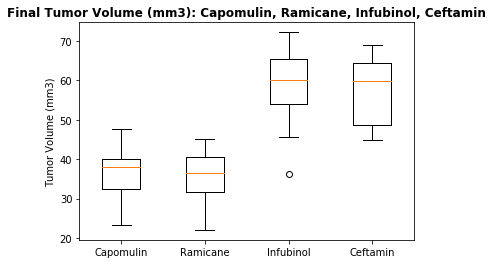

The Infubinol treatment has the outlier. 


In [89]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume (mm3): Capomulin, Ramicane, Infubinol, Ceftamin', weight="bold")
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot([capomulin["Final Tumor Volume (mm3)"],ramicane["Final Tumor Volume (mm3)"],infubinol["Final Tumor Volume (mm3)"],ceftamin["Final Tumor Volume (mm3)"]])
plt.xticks([1, 2, 3,4], ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin'])

plt.show()

print("The Infubinol treatment has the outlier. ")

## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume (mm3) Development for Mouse ID g288')

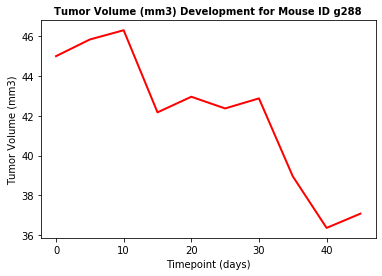

In [49]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Filter data down to a specific mouse on Capomulin treatment 
capomulin_study_g288 = clean_combined_df.loc[(clean_combined_df["Drug Regimen"] == "Capomulin") & (clean_combined_df["Mouse ID"] == "g288")]

# Generate a line plot illustrating the development of the tumor over the timepoints 
x_axis = capomulin_study_g288['Timepoint']
y_axis = capomulin_study_g288['Tumor Volume (mm3)']
plt.plot(x_axis, y_axis, color = "Red", linewidth = 2)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume (mm3) Development for Mouse ID g288", fontsize = 10, weight = "bold")

Text(0.5, 1.0, 'Mouse Weight Vs. Tumor Volume: Capomulin ')

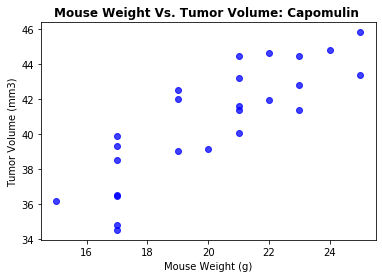

In [74]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Filter data to only the campomulin treated mice 
capomulin_study = clean_combined_df.loc[(clean_combined_df["Drug Regimen"] == "Capomulin")]
# Group df by Mouse ID to calculate average tumor volume
capomulin_id_group = capomulin_study.groupby(['Mouse ID'])
capomulin_avg_tumor = capomulin_id_group['Tumor Volume (mm3)'].mean()
# Obtain all the weight values for the scatter plot 
capomulin_weight = capomulin_id_group['Weight (g)'].mean()


# Generate scatter plot 
plt.scatter(capomulin_weight, capomulin_avg_tumor, marker="o", facecolors="blue", alpha=0.75)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight Vs. Tumor Volume: Capomulin ", weight="bold")

## Correlation and Regression

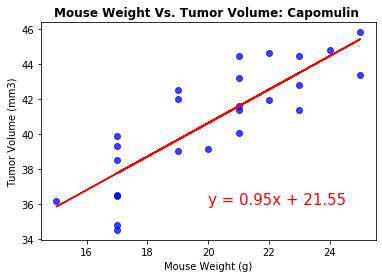

The r-squared is: 0.8419363424694718
y = 0.95x + 21.55


In [88]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_weight, capomulin_avg_tumor)
regress_values = capomulin_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Adding the liner regression eqn and line of best fit 
plt.scatter(capomulin_weight, capomulin_avg_tumor, marker="o", facecolors="blue", alpha=0.75)
plt.plot(capomulin_weight,regress_values,"r-")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight Vs. Tumor Volume: Capomulin ", weight="bold")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.show()

print(f"The r-squared is: {rvalue}")
print(line_eq)
